In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
data = pd.read_csv("Life Expectancy Data.csv")

In [42]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [43]:
status = data['Status'].value_counts()
country = data['Country'].value_counts()


Text(0.5, 1.0, 'Percentage of missing values per feature')

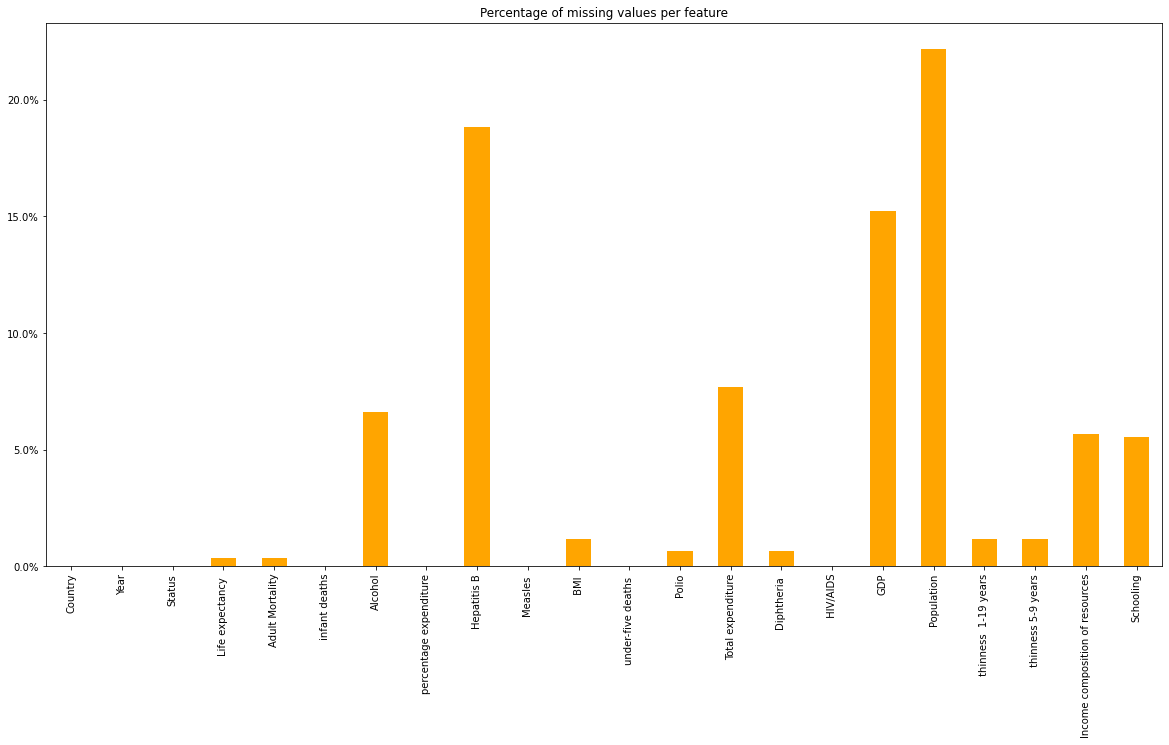

In [44]:
import matplotlib.ticker as mtick

data.isna().sum()

plt.figure(figsize = (20,10)) 
ax = (data.isnull().mean() * 100).plot(kind='bar', color ='orange')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Percentage of missing values per feature')

Text(0, 0.5, 'Life Expectancy')

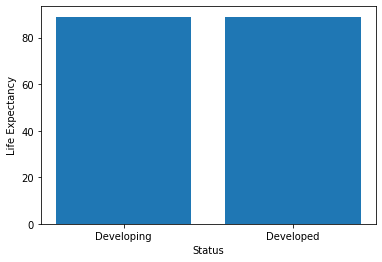

In [45]:
avg = data['Life expectancy '].mean()




plt.bar(data['Status'],data['Life expectancy '])
plt.xlabel('Status')
plt.ylabel('Life Expectancy')

In [24]:
mean_Adult_Mortality = data['Adult Mortality'].mean()
data['Adult Mortality'].fillna(mean_Adult_Mortality, inplace=True)

mean_Life_expectancy  = data['Life expectancy '].mean()
data['Life expectancy '].fillna(mean_Life_expectancy, inplace=True)

mean_Alcohol  = data['Alcohol'].mean()
data['Alcohol'].fillna(mean_Alcohol, inplace=True)

mean_Hepatitis  = data['Hepatitis B'].mean()
data['Hepatitis B'].fillna(mean_Hepatitis, inplace=True)

mean_Bmi  = data[' BMI '].mean()
data[' BMI '].fillna(mean_Bmi, inplace=True)

mean_Polio  = data['Polio'].mean()
data['Polio'].fillna(mean_Polio, inplace=True)

mean_totExpend  = data['Total expenditure'].mean()
data['Total expenditure'].fillna(mean_totExpend, inplace=True)

mean_dip  = data['Diphtheria '].mean()
data['Diphtheria '].fillna(mean_dip, inplace=True)

mean_gdp  = data['GDP'].mean()
data['GDP'].fillna(mean_gdp, inplace=True)

mean_pop = data['Population'].mean()
data['Population'].fillna(mean_pop, inplace=True)

mean_tnY1 = data[' thinness  1-19 years'].mean()
data[' thinness  1-19 years'].fillna(mean_tnY1, inplace=True)

mean_tnY2 = data[' thinness 5-9 years'].mean()
data[' thinness 5-9 years'].fillna(mean_tnY2, inplace=True)

mean_income = data['Income composition of resources'].mean()
data['Income composition of resources'].fillna(mean_income, inplace=True)

mean_school = data['Schooling'].mean()
data['Schooling'].fillna(mean_school, inplace=True)

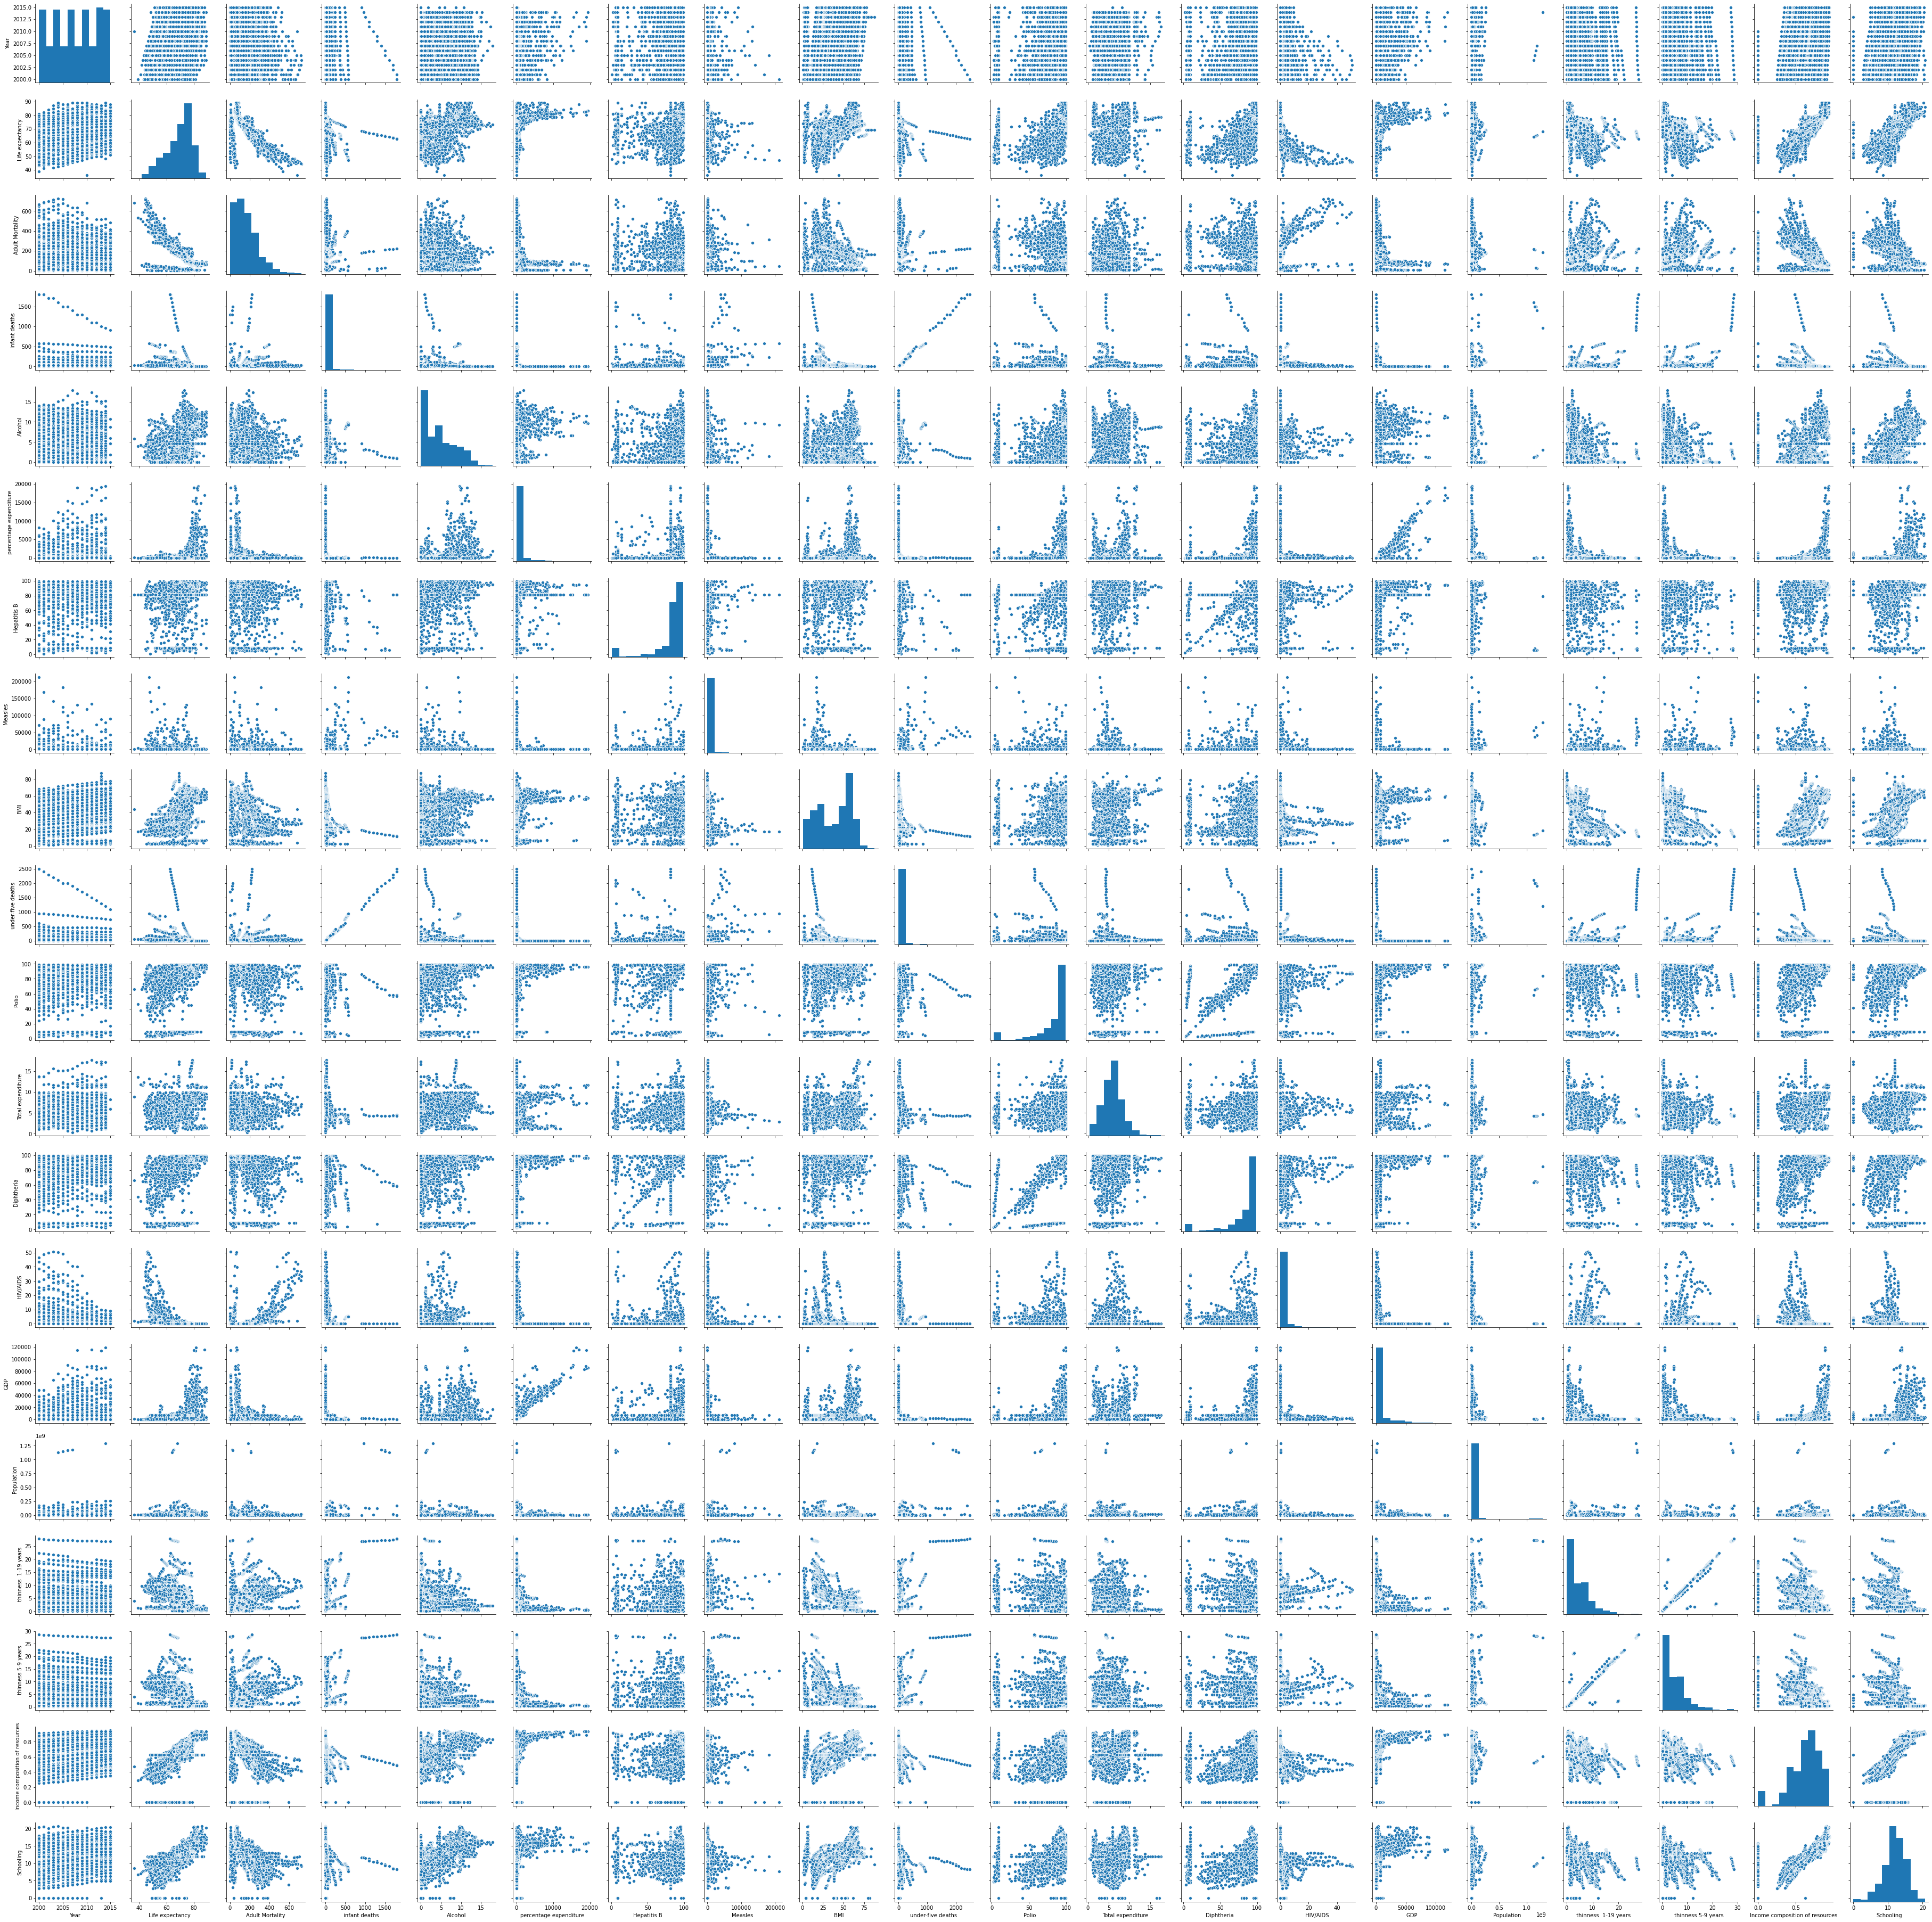

In [34]:
sns.pairplot(data)


In [26]:
def get_var_dtype_list(df):
    cat_cols = []
    num_cols = []

    for col in df.columns:
        if df[col].dtypes == 'object':
            cat_cols.append(col)
        else:
            num_cols.append(col)
    return (cat_cols, num_cols)

In [27]:
Y = data['Life expectancy ']

X = data.drop('Life expectancy ', axis=1)

cat_cols, num_cols = get_var_dtype_list(X)
X = pd.get_dummies(X, drop_first=True, columns=cat_cols)



Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0     2015            263.0             62     0.01               71.279624   
1     2014            271.0             64     0.01               73.523582   
2     2013            268.0             66     0.01               73.219243   
3     2012            272.0             69     0.01               78.184215   
4     2011            275.0             71     0.01                7.097109   
...    ...              ...            ...      ...                     ...   
2933  2004            723.0             27     4.36                0.000000   
2934  2003            715.0             26     4.06                0.000000   
2935  2002             73.0             25     4.43                0.000000   
2936  2001            686.0             25     1.72                0.000000   
2937  2000            665.0             24     1.68                0.000000   

      Hepatitis B  Measles    BMI   under-five deaths   Polio  ...  \
0            65.0      1154   19.1                  83    6.0  ...   
1            62.0       492   18.6                  86   58.0  ...   
2            64.0       430   18.1                  89   62.0  ...   
3            67.0      2787   17.6                  93   67.0  ...   
4            68.0      3013   17.2                  97   68.0  ...   
...           ...       ...    ...                 ...    ...  ...   
2933         68.0        31   27.1                  42   67.0  ...   
2934          7.0       998   26.7                  41    7.0  ...   
2935         73.0       304   26.3                  40   73.0  ...   
2936         76.0       529   25.9                  39   76.0  ...   
2937         79.0      1483   25.5                  39   78.0  ...   

      Country_United States of America  Country_Uruguay  Country_Uzbekistan  \
0                                    0                0                   0   
1                                    0                0                   0   
2                                    0                0                   0   
3                                    0                0                   0   
4                                    0                0                   0   
...                                ...              ...                 ...   
2933                                 0                0                   0   
2934                                 0                0                   0   
2935                                 0                0                   0   
2936                                 0                0                   0   
2937                                 0                0                   0   

      Country_Vanuatu  Country_Venezuela (Bolivarian Republic of)  \
0                   0                                           0   
1                   0                                           0   
2                   0                                           0   
3                   0                                           0   
4                   0                                           0   
...               ...                                         ...   
2933                0                                           0   
2934                0                                           0   
2935                0                                           0   
2936                0                                           0   
2937                0                                           0   

      Country_Viet Nam  Country_Yemen  Country_Zambia  Country_Zimbabwe  \
0                    0              0               0                 0   
1                    0              0               0                 0   
2                    0              0               0                 0   
3                    0              0               0                 0   
4                    0              0               0          

In [28]:
num_cols

['Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [29]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [30]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<ipython-input-30-604acfcf3488>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
C:\Users\kshit\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-30-604acfcf3488>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [32]:
X_test.head()

Year  Adult Mortality  infant deaths   Alcohol  \
1201 -1.638650         0.457582      15.426099 -0.924741   
1628 -0.549114        -1.080034       0.244491 -1.021535   
1317  0.976237        -0.851362      -0.234561  0.720748   
1392 -1.420743         0.418156      -0.251981 -1.008799   
1308 -0.549114        -0.039186      -0.243271 -0.247187   

      percentage expenditure  Hepatitis B  Measles       BMI   \
1201               -0.353946     0.002417  3.256770 -1.325538   
1628               -0.333348     0.092715 -0.197302 -0.995741   
1317               -0.302474     0.002417 -0.179944 -0.506042   
1392               -0.333469     0.180404 -0.200240  1.542696   
1308               -0.355099     0.794223 -0.200240  0.418388   

      under-five deaths      Polio  ...  Country_United States of America  \
1201           15.812732 -1.097287  ...                                 0   
1628            0.391068 -0.196732  ...                                 0   
1317           -0.238913  0.703824  ...                                 0   
1392           -0.258198  0.232104  ...                                 0   
1308           -0.251770  0.703824  ...                                 0   

      Country_Uruguay  Country_Uzbekistan  Country_Vanuatu  \
1201                0                   0                0   
1628                0                   0                0   
1317                0                   0                0   
1392                0                   0                0   
1308                0                   0                0   

      Country_Venezuela (Bolivarian Republic of)  Country_Viet Nam  \
1201                                           0                 0   
1628                                           0                 0   
1317                                           0                 0   
1392                                           0                 0   
1308                                           0                 0   

      Country_Yemen  Country_Zambia  Country_Zimbabwe  Status_Developing  
1201              0               0                 0                  1  
1628              0               0                 0                  1  
1317              0               0                 0                  0  
1392              0               0                 0                  1  
1308              0               0                 0                  1  

[5 rows x 212 columns]

Text(0, 0.5, 'Predicted Y')

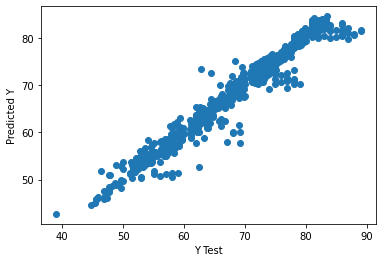

In [33]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

prediction = lm.predict(X_test)

plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')